# 1. Réaliser une veille sur les Random Forest.


# 3. Visualiser et analyser les données avec les librairies Matplotlib et Seaborn.

In [1]:
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning


In [2]:
dataframe = pd.read_csv('cardio_train.csv', sep=';')
dataframe.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>],
       [<AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'cardio'}>]], dtype=object)

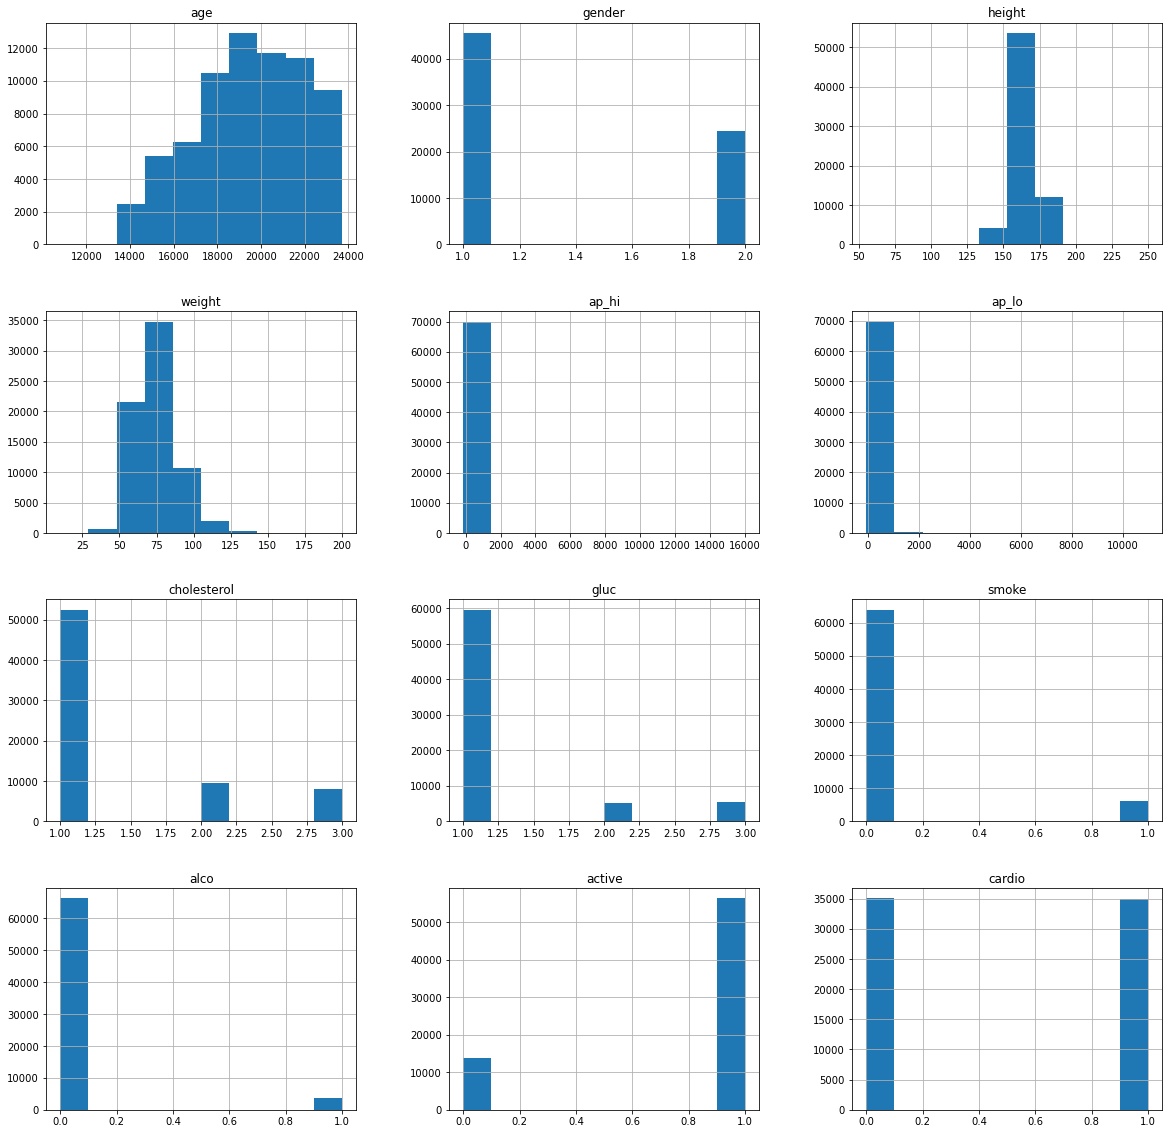

In [3]:
dataframe[dataframe.columns[1:13]].hist(figsize=(20, 20))

In [4]:
dataframe[dataframe.columns[1:13]].corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


In [5]:
Matrix_de_correl =dataframe[dataframe.columns[1:13]].corr()

In [6]:
import seaborn as sn
import matplotlib.pyplot as plt

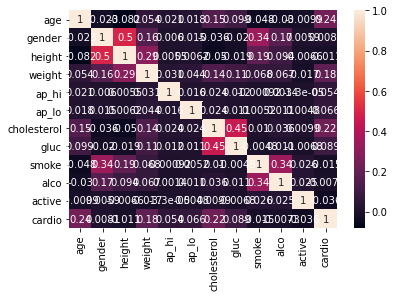

In [7]:
sn.heatmap(Matrix_de_correl, annot=True)
plt.show()

In [8]:
from pandas_profiling import ProfileReport

In [9]:
ProfileReport(dataframe[dataframe.columns[1:12]])

/home/constantjunior/anaconda3/envs/plotly/lib/python3.8/site-packages/pandas/core/frame.py:4300: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


# 4. exploration des données, préparation des données, modélisation, le test et l’interprétation des résultats)

In [10]:
X = dataframe[dataframe.columns[1:12]]
targets = dataframe['cardio']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, targets, train_size=0.8, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(oob_score=True, random_state=42)

Text(0.5, 0, 'Relative Importance')

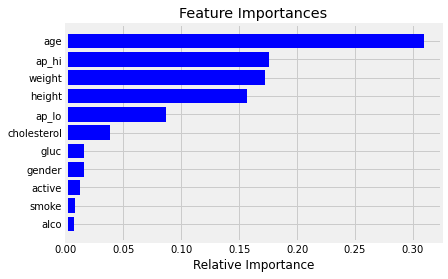

In [13]:
import numpy as np

features = ['age','gender','height','weight','ap_hi', 'ap_lo', 'cholesterol','gluc', 'smoke', 'alco','active']
importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

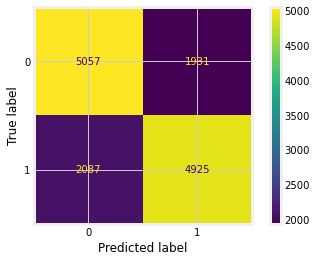

In [14]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, Y_test)  
plt.show() 

In [15]:
y_pred=rf.predict(X_test)

In [16]:
y_pred.reshape

<function ndarray.reshape>

In [17]:
from sklearn.metrics import classification_report

In [18]:
target_names = ['No', 'Yes']
print(classification_report(Y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.71      0.72      0.72      6988
         Yes       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



# with StandardScaler

In [19]:
# standard scaller
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# sc.fit(X_train)
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

In [20]:
rf_sc = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_sc.fit(X_train_sc, Y_train)

RandomForestClassifier(oob_score=True, random_state=42)

Text(0.5, 0, 'Relative Importance')

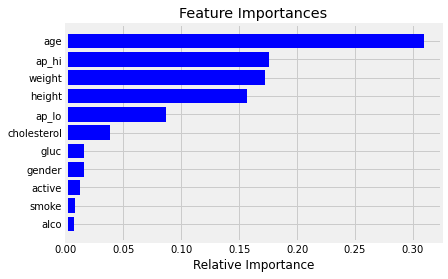

In [21]:
importances_2 = rf_sc.feature_importances_
indices = np.argsort(importances_2)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_2[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

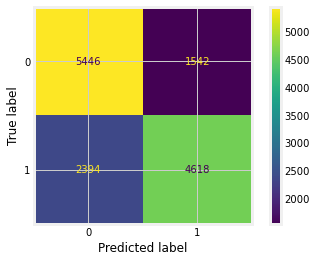

In [22]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_sc, X_test_sc, Y_test)  
plt.show() 

In [23]:
y_pred_sc=rf_sc.predict(X_test_sc)

In [24]:
target_names = ['No', 'Yes']
print(classification_report(Y_test, y_pred_sc, target_names=target_names))

              precision    recall  f1-score   support

          No       0.69      0.78      0.73      6988
         Yes       0.75      0.66      0.70      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



# 5 . Prédiction sur Arthur

Prédire si Arthur 53 ans, fumeur, sportif, 175 cm, 85 kg, avec un taux de cholestérol au dessus de la normal et un taux de glucose normal, une tension artérielle systolique dans la moyenne et une pression sanguine diastolique correspondant à la moyenne du 3e quartile (50%-75%) du jeu de données, est un sujet à risques cardio-vasculaires

In [25]:
print('Tension artérielle : ',round(X['ap_hi'].mean())) #tension artérielle
print('La pression artérielle :' , round(np.percentile(X['ap_lo'], 75))) #pression sanguine diastolique

Tension artérielle :  129
La pression artérielle : 90


In [26]:
# Donnees Arthur
arthur = [[53*365, 2, 175,85,129,90,2,1,1,0,1]]
arthur

[[19345, 2, 175, 85, 129, 90, 2, 1, 1, 0, 1]]

In [27]:
# Sans standardscaler

if(rf.predict(arthur)==1):
    print('il est à risque') 
elif(rf.predict(arthur)==0):
    print("il n'est pas a risque")

il est à risque


In [89]:
# Avec StandardScaler
sc_art = StandardScaler()
artu = sc_art.fit_transform(arthur)
rf_sc.predict(artu)
print('La prediction_proba sur X_test:',rf.predict_proba(artu))

La prediction_proba sur X_test: [[0.76 0.24]]


# Grid Search CV

In [42]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
from sklearn.ensemble import RandomForestClassifier
randomfor = RandomForestClassifier(random_state=42)



In [46]:
param_grid = {
        'bootstrap': [True, False],
        'max_features': [2, 8],
        'n_estimators': [4,100]
    }# Create a based model

grid= GridSearchCV(estimator = randomfor, param_grid = param_grid, 
                          cv = 5)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 8],
                         'n_estimators': [4, 100]})

In [51]:
print('Meilleur resultat:', round(grid.best_score_,3))
print('Les parametre utilisé :',grid.best_params_)

Meilleur resultat: 0.715
Les parametre utilisé : {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}


In [59]:
grid_SC= GridSearchCV(estimator = randomfor, param_grid = param_grid, 
                          cv = 5)
grid_SC.fit(X_train_sc, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 8],
                         'n_estimators': [4, 100]})

In [61]:
print('Meilleur resultat:', round(grid_SC.best_score_,3))
print('Les parametre utilisé :',grid_SC.best_params_)

Meilleur resultat: 0.716
Les parametre utilisé : {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}


# With LogisticRegression

In [64]:
from sklearn.linear_model import LogisticRegression
# without SandardScaler
clf = LogisticRegression(random_state=42).fit(X_train, Y_train)
print('La prediction sur X_test:',clf.predict(X_test))
print('La prediction_proba sur X_test:',clf.predict_proba(X_test))
print('Le score:',clf.score(X_train, Y_train))

La prediction sur X_test: [1 1 1 ... 0 1 0]
La prediction_proba sur X_test: [[0.28861296 0.71138704]
 [0.20702159 0.79297841]
 [0.18109084 0.81890916]
 ...
 [0.59689287 0.40310713]
 [0.38097618 0.61902382]
 [0.5084715  0.4915285 ]]
Le score: 0.6938928571428571


In [68]:
# with SandardScaler
clf_sc = LogisticRegression(random_state=42).fit(X_train_sc, Y_train)
print('La prediction sur X_test:',clf_sc.predict(X_test_sc))
print('La prediction_proba sur X_test:',clf_sc.predict_proba(X_test_sc))
print('Le score:',clf_sc.score(X_train_sc, Y_train))

La prediction sur X_test: [1 1 1 ... 0 1 1]
La prediction_proba sur X_test: [[0.26928809 0.73071191]
 [0.20180773 0.79819227]
 [0.30967318 0.69032682]
 ...
 [0.54668781 0.45331219]
 [0.32566944 0.67433056]
 [0.44777403 0.55222597]]
Le score: 0.7193392857142857


# Grid Search logistic regression

In [87]:
# without SandardScaler
Arturo = clf.predict(arthur)
# with SC
Arturo_2 = clf.predict(artu)
print('predictions sans SC :',Arturo)
print('prediction avec SC :',Arturo_2)
# Pourcentage
print('La prediction_proba sur X_test:',clf.predict_proba(arthur))
# print('Le score:',clf_sc.score(X_train_sc, Y_train))

predictions sans SC : [0]
prediction avec SC : [0]
La prediction_proba sur X_test: [[0.54880828 0.45119172]]


In [ ]:
# def simulateur_cardio_vasculaire():
#     print('votre age')
#     age = int(input())
#     print('votre sexe')
#     sexe = str(input())
#     print('votre taille')
#     taille = int(input())
#     print('votre poids')
#     poids = int(input())
#     print('vous fumez?')
#     smoke = str(input())
#     print("vous consommez d'alcool?")
#     alcol = str(input())
#     print('Faites vous du sport ?')
#     sport = str(input())
#     sexe_final=0
    
#     if(sexe== 'Homme'):
#         sexe_final= 2
#     elif(sexe== 'femme'):
#         sexe_final=1
        
#     if(smoke=='yes'):
#         smoke_= 1
#     elif(smoke=='no'):
#         smoke_=0
        
#     if(alcol=='yes'):
#         alcol_= 1
#     elif(alcol=='no'):
#         alcol_=0
        
#     if(sport=="yes"):
#         sport_= 1
#     elif(sport=="no"):
#         sport_=0
#     if(smoke=='yes' and alcol=='yes' and sport=="yes"):
#         smoke_=1
#         alcol_=1
#         sport_=1
#     elif(smoke=='no' and alcol=='no' and sport=="no"):
#         smoke_=1
#         alcol_=1
#         sport_=1
#     patient=[[age*365,sexe_final,taille,poids, 129, 90, 2,1,smoke_,alcol_,sport_]]
#     if(rf.predict(patient)==1):
#         reponse = 'Il y a risque' 
#     elif(rf.predict(patient)==0):
#         reponse ="il n'est pas a risque"
#     return reponse

In [ ]:
# simulateur_cardio_vasculaire()

In [84]:
param_grid_ludo = {
    'bootstrap': [True, False],
    'max_depth': [80, 90],
    'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
    'n_estimators': [10,  100]
}

In [85]:
grid_SC_lud= GridSearchCV(estimator = randomfor, param_grid = param_grid_ludo, 
                          cv = 5)
grid_SC_lud.fit(X_train_sc, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False], 'max_depth': [80, 90],
                         'max_features': [2, 3], 'n_estimators': [10, 100]})

In [ ]:
nsxg = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
nsxg.fit(X_train2, y_train2)

In [86]:
round(grid_SC_lud.best_score_,3)

0.717

In [91]:
X_train_2=dataframe.iloc[:,0:3]

In [92]:
X_train_2

,id,age,gender
0,0,18393,2
1,1,20228,1
2,2,18857,1
3,3,17623,2
4,4,17474,1
...,...,...,...
69995,99993,19240,2
69996,99995,22601,1
69997,99996,19066,2
69998,99998,22431,1


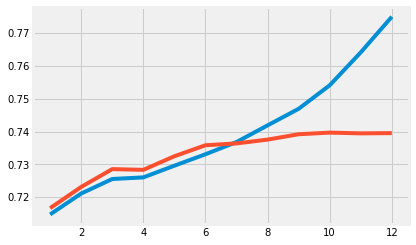

In [96]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
max_depths = np.linspace(1, 12, 12, endpoint=True)
train_results = []
test_results = []

for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators=100,max_depth=max_depth, n_jobs=-1)
    rf.fit(X_train, Y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)

    roc_auc = auc(false_positive_rate, true_positive_rate)

    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results)
line2, = plt.plot(max_depths, test_results)
#plt.xlabel(‘Tree depth’)
plt.show()